In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

# per importare cose nella folder precedente da ora in poi
import sys
sys.path.append('../')

from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *
from metrics import *
from validation import *
from gridsearch import grid_search

random.seed(42)
np.random.seed(42)

# Progress bar
from tqdm import tqdm
import time

In [2]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

### Separating training set and test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

### Rescaling the output to the [0,1] range

In [4]:
from sklearn.preprocessing import MinMaxScaler

rescaler = MinMaxScaler()
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
rescaler.fit(y_train)
y_train = rescaler.transform(y_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

Combination: [512, 64, 3] ReLU Fan_in (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.0005


Epochs:  12%|█▏        | 1201/10000 [06:28<47:27,  3.09it/s] 


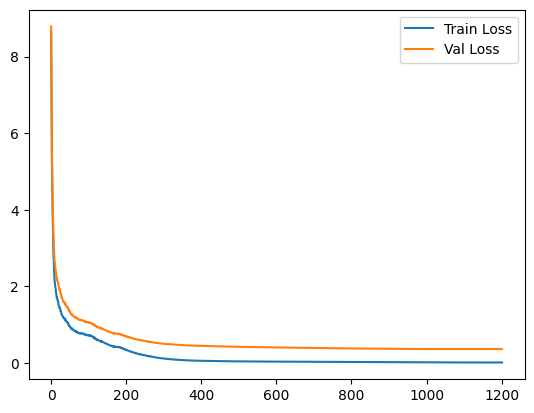

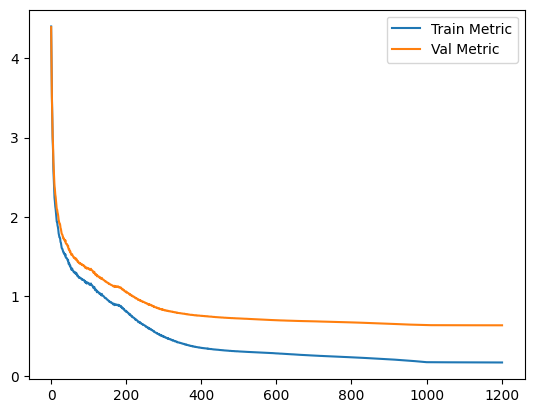

Fold 1 of 6 completed
Train Loss: 0.01615403887070704
Train Metric: 0.19280770974622166
Val Loss: 0.36386437659546755
Val Metric: 0.646942503558251


Epochs:  12%|█▏        | 1239/10000 [07:11<50:51,  2.87it/s]  


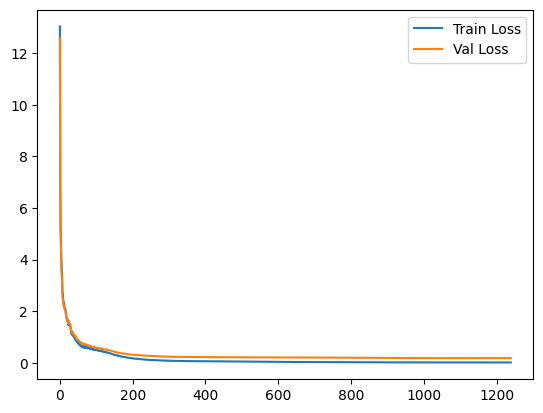

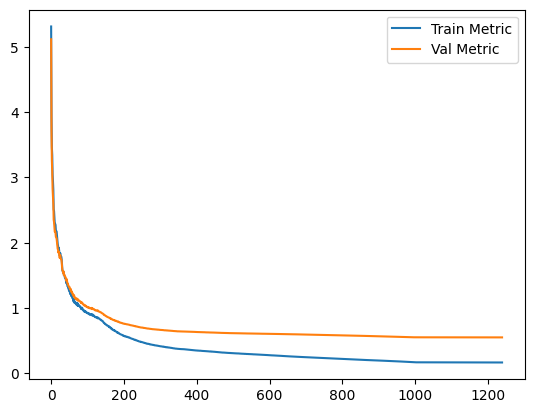

Fold 2 of 6 completed
Train Loss: 0.012996444172984302
Train Metric: 0.17205118865606725
Val Loss: 0.1810690729547102
Val Metric: 0.553123072152266


Epochs:  11%|█         | 1099/10000 [05:58<48:21,  3.07it/s]  


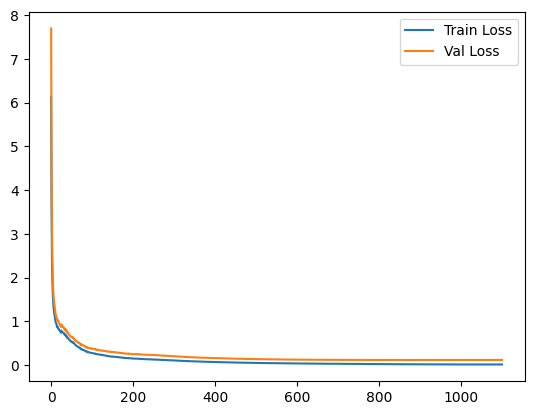

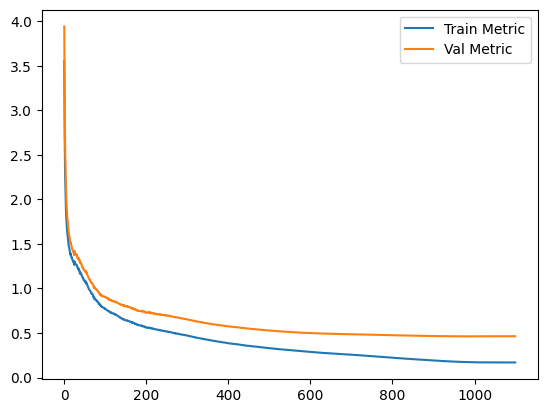

Fold 3 of 6 completed
Train Loss: 0.018009435554286152
Train Metric: 0.2060644035658562
Val Loss: 0.11441385510639265
Val Metric: 0.4699506511745419


Epochs:  14%|█▎        | 1368/10000 [07:23<46:36,  3.09it/s] 


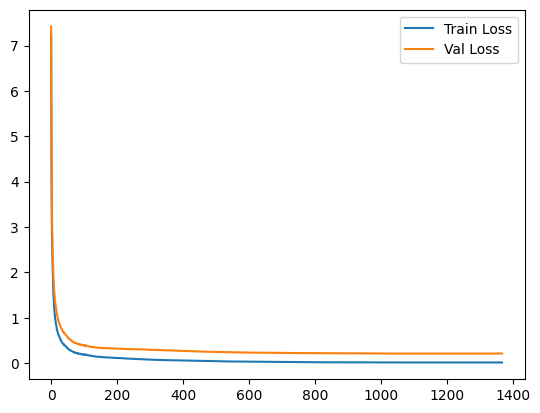

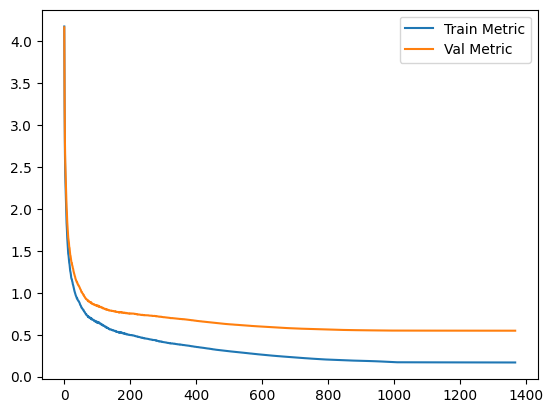

Fold 4 of 6 completed
Train Loss: 0.012340925721906279
Train Metric: 0.17055306812822682
Val Loss: 0.20937220630299994
Val Metric: 0.548828613416676


Epochs:  15%|█▍        | 1493/10000 [07:01<40:01,  3.54it/s]  


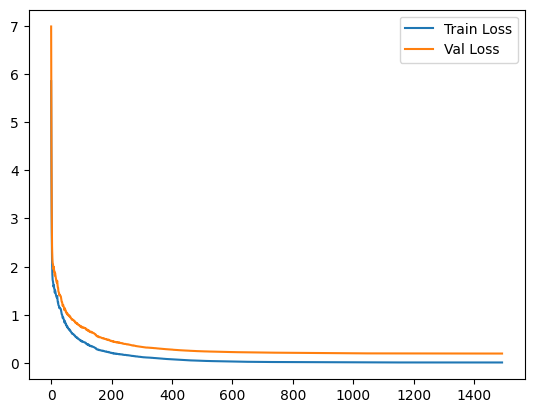

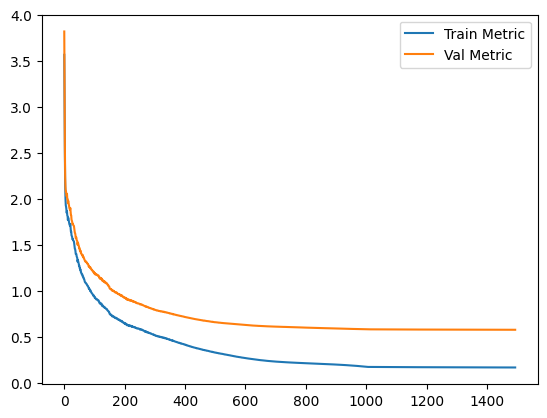

Fold 5 of 6 completed
Train Loss: 0.012835124340345921
Train Metric: 0.17184673756085617
Val Loss: 0.1994331965482144
Val Metric: 0.5809583428281954


Epochs:  11%|█▏        | 1142/10000 [05:23<41:45,  3.54it/s]  


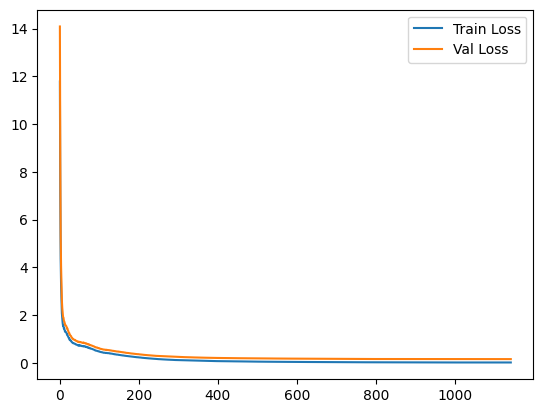

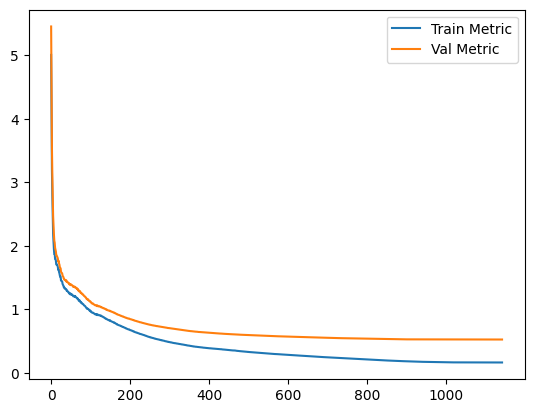

Fold 6 of 6 completed
Train Loss: 0.014651432233296223
Train Metric: 0.18671251306666653
Val Loss: 0.15318482578548315
Val Metric: 0.5304136576649169
Combination: [512, 64, 3] ReLU Fan_in (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.0005
Statistics: {'tr_loss': 0.014497900148920988, 'tr_metric': 0.1833392701206491, 'val_loss': 0.203556255548878, 'val_metric': 0.5550361401324745}





In [8]:
hyperparameters = {
    'layers_sizes': [[512, 64, 3]],
    'activations': ["ReLU"], 
    'startings': ["Fan_in"],
    'startings_range': [(-0.5, 0.5)],
    'regularizers': ["L2"],
    'regularizers_lambda': [1e-8],
    'momentums': [('Nesterov', 0.9)],
    'etas': [5e-4],
}

data_to_csv = grid_search(
    hyperparams=hyperparameters,
    X=X_train,
    y=y_train,
    k=6,
    metric=MEE(),
    loss=MSE(1),
    seed=6,
    verbose=True
)

In [ ]:
# reshape ytrain eliminating last shape
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
y_train.shape

In [ ]:
# reshape Xtrain eliminating last shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train.shape

In [ ]:
# use scikit-lear to make regression in 3d
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(32,32),
    activation='relu',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=1e-3,
    max_iter=2500,
    shuffle=True,
    random_state=6,
    verbose=True,
    momentum=0,
    beta_1= 0,
    beta_2= 0.,
    epsilon= 1,
    validation_fraction = 0,
    nesterovs_momentum=False
)

mlp.fit(X_train, y_train)
# print the learning curve
plt.plot(mlp.loss_curve_)
plt.show()

# print the mean error
print(MEE()(y_train, mlp.predict(X_train)))

In [9]:
import csv

csv_file_path = '../statistics/test.csv'
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write the data to the CSV file
    for row in data_to_csv:
        writer.writerow(row)    